Este algoritmo genera una imagen de prueba cuadrada con puntos dispersos. Puedes ajustar los parámetros tamano, separacion y densidad según tus necesidades.

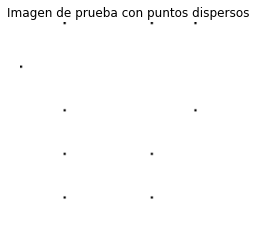

In [41]:
import numpy as np
import matplotlib.pyplot as plt

def generar_imagen_prueba(tamano=100, separacion=20, densidad=0.3):
    imagen = np.ones((tamano, tamano), dtype=np.uint8) * 255  # Crear una imagen en blanco (fondo blanco)
    
    # Generar puntos dispersos
    for x in range(0, tamano, separacion):
        for y in range(0, tamano, separacion):
            if np.random.rand() < densidad:
                imagen[y, x] = 0  # Pintar el punto disperso en negro
    
    return imagen

# Generar la imagen de prueba
imagen_prueba = generar_imagen_prueba()

# Mostrar la imagen generada
plt.imshow(imagen_prueba, cmap='gray')
plt.axis('off')
plt.title('Imagen de prueba con puntos dispersos')
plt.show()

Este algoritmo analiza la imagen generada y reconoce los puntos dispersos. Luego, muestra las coordenadas de los puntos dispersos reconocidos.

In [42]:
def reconocer_puntos(imagen, tamano=100, separacion=20):
    puntos = []
    for x in range(0, tamano, separacion):
        for y in range(0, tamano, separacion):
            if imagen[y, x] == 0:  # Si el pixel es negro, considerarlo como un punto disperso
                puntos.append((x, y))
    return puntos

# Reconocer los puntos en la imagen de prueba
puntos_reconocidos = reconocer_puntos(imagen_prueba)

# Mostrar los puntos reconocidos
print("Puntos dispersos reconocidos:")
print(puntos_reconocidos)

Puntos dispersos reconocidos:
[(0, 20), (20, 0), (20, 40), (20, 60), (20, 80), (60, 0), (60, 60), (60, 80), (80, 0), (80, 40)]


   ### Otra versión: Genera puntosgráficos y id

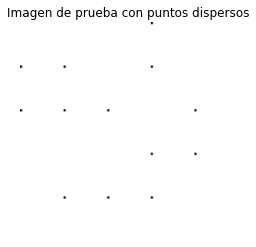

ID hexadecimal generado: 00140028141414281450282828503c003c143c3c3c505028503c


In [43]:
import numpy as np

def generar_imagen_prueba(tamano=100, separacion=20, densidad=0.4):
    imagen = np.ones((tamano, tamano), dtype=np.uint8) * 255  # Crear una imagen en blanco (fondo blanco)
    
    puntos = []  # Lista para almacenar los puntos dispersos generados
    
    # Generar puntos dispersos
    for x in range(0, tamano, separacion):
        for y in range(0, tamano, separacion):
            if np.random.rand() < densidad:
                imagen[y, x] = 0  # Pintar el punto disperso en negro
                puntos.append((x, y))  # Agregar el punto a la lista
    
    # Ordenar los puntos en orden ascendente
    puntos.sort()
    
    # Convertir las coordenadas de los puntos en un ID hexadecimal
    id_hexadecimal = convertir_a_hexadecimal(puntos)
    
    return imagen, id_hexadecimal

def convertir_a_hexadecimal(puntos):
    id_concatenado = ""
    for punto in puntos:
        id_concatenado += f"{punto[0]:02x}{punto[1]:02x}"  # Concatenar coordenadas en formato hexadecimal
    return id_concatenado

# Generar la imagen de prueba y obtener el ID hexadecimal generado
imagen_prueba, id_hexadecimal = generar_imagen_prueba()

# Mostrar la imagen generada
plt.imshow(imagen_prueba, cmap='gray')
plt.axis('off')
plt.title('Imagen de prueba con puntos dispersos')
plt.show()

# Mostrar el ID hexadecimal generado
print("ID hexadecimal generado:", id_hexadecimal)


### Código de reconocimiento de puntos a partir del id anterior.
En este código, la función reconocer_puntos_por_id interpreta el ID generado anteriormente y extrae las coordenadas de cada punto a partir del mismo. Luego, devuelve una lista de puntos reconocidos utilizando estas coordenadas extraídas del ID. Esto permite recuperar los puntos dispersos sin necesidad de buscarlos en la imagen original. Utiliza el criterio de "concatenación ordenada de coordenadas"

In [44]:
def reconocer_puntos_por_id(id_hexadecimal, tamano=100, separacion=20):
    puntos = []
    for i in range(0, len(id_hexadecimal), 4):  # Cada coordenada ocupa 4 caracteres hexadecimales
        x = int(id_hexadecimal[i:i+2], 16)  # Extraer la coordenada x
        y = int(id_hexadecimal[i+2:i+4], 16)  # Extraer la coordenada y
        puntos.append((x, y))
    return puntos

# Reconocer los puntos en la imagen de prueba a partir del ID generado
puntos_reconocidos_por_id = reconocer_puntos_por_id(id_hexadecimal)

# Mostrar los puntos reconocidos
print("Puntos dispersos reconocidos a partir del ID:")
print(puntos_reconocidos_por_id)

# Mostrar el ID hexadecimal generado
print("ID hexadecimal generado:", id_hexadecimal)


Puntos dispersos reconocidos a partir del ID:
[(0, 20), (0, 40), (20, 20), (20, 40), (20, 80), (40, 40), (40, 80), (60, 0), (60, 20), (60, 60), (60, 80), (80, 40), (80, 60)]
ID hexadecimal generado: 00140028141414281450282828503c003c143c3c3c505028503c


### Genera la imagen a partir del id
En este código, la función generar_imagen_desde_id toma el ID hexadecimal generado anteriormente y utiliza la función reconocer_puntos_por_id para obtener las coordenadas de los puntos dispersos. Luego, pinta estos puntos en una nueva imagen y devuelve esta imagen. Finalmente, se muestra la imagen generada. Esto te permite visualizar la distribución gráfica de los puntos a partir del ID generado.

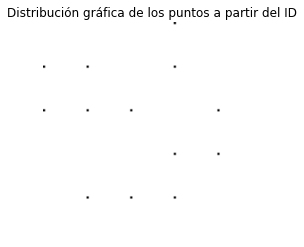

In [45]:
import numpy as np
import matplotlib.pyplot as plt

def generar_imagen_desde_id(id_hexadecimal, tamano=100):
    imagen = np.ones((tamano, tamano), dtype=np.uint8) * 255  # Crear una imagen en blanco (fondo blanco)
    
    puntos = reconocer_puntos_por_id(id_hexadecimal)  # Reconocer los puntos a partir del ID
    
    # Pintar los puntos dispersos en la imagen
    for punto in puntos:
        imagen[punto[1], punto[0]] = 0  # Pintar el punto en negro
    
    return imagen

# Generar la imagen de distribución gráfica a partir del ID
imagen_desde_id = generar_imagen_desde_id(id_hexadecimal)

# Mostrar la imagen generada
plt.imshow(imagen_desde_id, cmap='gray')
plt.axis('off')
plt.title('Distribución gráfica de los puntos a partir del ID')
plt.show()


In [47]:
import random

# Definir el campo finito Z_10007
Z_10007 = 10007

# Encontrar un punto base P0 perteneciente a la curva elíptica
P0 = None
for _ in range(Z_10007):  # Intentar un máximo de 1000 veces
    x = random.randint(1, Z_10007 - 1)  # Empezar en 1 para evitar el punto en el origen (0, 0)
    y_squared = x**3 - 25*x
    if y_squared < 0:
        continue  # Si y_squared es negativo, no hay raíz cuadrada real
    y = int(y_squared ** 0.5)  # Raíz cuadrada entera
    if y**2 == y_squared:
        P0 = (x, y)
        break

if P0 is None:
    raise ValueError("No se pudo encontrar un punto base válido en la curva elíptica.")

print("Punto base P0:", P0)


Punto base P0: (5, 0)


#### Genera un punto Po de una CE y 99 adicionales pertenecientes al campo

In [48]:
# Definir el campo finito Z_10007
Z_10007 = 10007

# Encontrar un punto base P0 perteneciente a la curva elíptica
P0 = (45, 300)  # Aquí reemplaza por el punto base que hayas obtenido

# Generar 99 puntos adicionales en el campo finito Z_10007 a partir del punto base
puntos_adicionales = [P0]
for _ in range(99):
    x = random.randint(0, Z_10007 - 1)  # Escoger un x aleatorio dentro del rango del campo finito
    y_squared = (x**3 - 25*x) % Z_10007  # Calcular y^2 en el campo finito
    raiz_cuadrada = pow(y_squared, (Z_10007 + 1) // 4, Z_10007)  # Calcular la raíz cuadrada modular
    if raiz_cuadrada**2 % Z_10007 == y_squared:  # Verificar si la raíz cuadrada es válida
        puntos_adicionales.append((x, raiz_cuadrada))
    else:
        puntos_adicionales.append((x, Z_10007 - raiz_cuadrada))  # Si no es válida, usar el negativo modular

print("Puntos generados adicionales:")
for punto in puntos_adicionales:
    print(punto)

Puntos generados adicionales:
(45, 300)
(9558, 2441)
(5980, 9395)
(1690, 7820)
(891, 4487)
(419, 8870)
(4916, 9902)
(1738, 8063)
(5586, 7910)
(6365, 7003)
(836, 4591)
(3160, 810)
(6833, 5057)
(4876, 5349)
(2923, 4206)
(7383, 6124)
(976, 8916)
(658, 7335)
(7224, 5698)
(270, 1218)
(3805, 2345)
(9473, 116)
(8624, 3857)
(1643, 9584)
(1235, 983)
(961, 7596)
(9722, 7027)
(3960, 3732)
(2499, 3312)
(4215, 2699)
(7965, 8215)
(2546, 1229)
(1280, 5714)
(5248, 2478)
(325, 3050)
(1997, 823)
(7826, 571)
(5555, 5320)
(1606, 2195)
(1639, 2365)
(1319, 6561)
(5265, 8668)
(8548, 6964)
(9028, 5327)
(1590, 7109)
(1971, 7083)
(8196, 675)
(517, 1638)
(8721, 8486)
(1382, 2443)
(1630, 926)
(7565, 8694)
(345, 9946)
(5962, 1199)
(9996, 2481)
(7558, 4505)
(3130, 8274)
(5307, 1904)
(7292, 3674)
(7065, 4017)
(9538, 3596)
(3563, 3205)
(2823, 7633)
(7639, 218)
(5154, 1243)
(9921, 9718)
(9387, 3012)
(4710, 526)
(3834, 6665)
(4883, 1814)
(7770, 2164)
(9927, 1188)
(9446, 5469)
(2539, 1094)
(8627, 3237)
(6775, 6722)
(308

Definición del campo finito y el punto base (P0): Se define un campo finito Z_10007 y se elige un punto base P0. En este caso, el punto base se define en la esquina superior izquierda del espacio de visualización.

Generación de puntos adicionales: Se generan 99 puntos adicionales alrededor del punto base P0. Estos puntos se generan aleatoriamente dentro de un rango que permite una distribución alrededor de P0.

Extracción de coordenadas: Se extraen las coordenadas x e y de los puntos generados y del punto base para su posterior visualización.

La distancia promedio entre los puntos dados es de aproximadamente tantas unidades. Esto significa que, en promedio, los puntos están separados por esta distancia en el espacio. Dependiendo del contexto del problema, puedes interpretar esta distancia para evaluar la dispersión de los puntos. Si la distancia promedio es grande, los puntos están más dispersos, mientras que si es pequeña, los puntos están más cercanos entre sí.

### Inicio de ejemplo con Curvas Elípticas
### Genera puntos

[(0, 99003), (32440, 52331), (42367, 8656), (84104, 87993), (54235, 33146), (98153, 28197), (26459, 55816), (4030, 61649), (26016, 95891), (74502, 20062), (96087, 5457), (67651, 74595), (93921, 78388), (30363, 20155), (84251, 92116), (50867, 77473), (16485, 16159), (4423, 5979), (56364, 91460), (96413, 93393), (66630, 5029), (37433, 11180), (6074, 86090), (83065, 39018), (30231, 20300), (2073, 89194), (44475, 60790), (82010, 73566), (52663, 24206), (91614, 78817), (71100, 8506), (12691, 75166), (44372, 25622), (88722, 12256), (78832, 91487), (35885, 88554), (46782, 89247), (12887, 13253), (78270, 98906), (12775, 93391), (22241, 21843), (65158, 25107), (40546, 52966), (66735, 702), (31043, 42527), (4599, 37831), (85626, 62316), (80605, 47474), (76814, 31149), (53414, 4044), (90040, 81892), (97329, 25002), (13714, 61069), (12599, 27743), (35569, 1806), (43385, 32695), (85965, 4984), (13392, 30107), (28649, 74786), (34032, 98308), (59899, 43685), (77794, 66548), (75799, 6450), (27370, 489

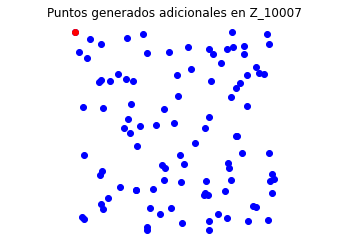

In [45]:
import matplotlib.pyplot as plt
from itertools import combinations
import random

# Definir el campo finito Z_10007
# Z_finito = 10007
Z_finito = 100003

# Definir las coordenadas del punto base P0 (en la esquina superior izquierda)
P0 = (0, 100003 - 1000)

# Generar 99 puntos adicionales en el campo finito Z_finito alrededor del punto base P0
# Ojo MODIFICADO POR MI
puntos_adicionales = [P0]
for _ in range(99):
    # Generar coordenadas x e y aleatorias dentro del campo finito Z_finito
    x = random.randint(0, Z_finito - 1)
    y = random.randint(0, Z_finito - 1)
    
    # Generar coordenadas x e y aleatorias alrededor del punto base P0
#     x = random.randint(P0[0], P0[0] + 1000)
#     y = random.randint(P0[1] - 1000, P0[1])
    puntos_adicionales.append((x, y))
print (puntos_adicionales)
    
# Extraer coordenadas x y y de los puntos
x_coords = [p[0] for p in puntos_adicionales]
y_coords = [p[1] for p in puntos_adicionales]

# Configurar el aspecto del gráfico
plt.axis('equal')
plt.axis('off')  # Ocultar ejes
plt.title('Puntos generados adicionales en Z_10007')

# Graficar los puntos adicionales
plt.scatter(x_coords, y_coords, label='Puntos adicionales', color='blue')
# Graficar el punto base
plt.scatter(P0[0], P0[1], label='Punto base', color='red')

# # Generar el ID de los 100 puntos con separador (-) entre las coordenadas
# id_concatenado = ""
# for punto in puntos_adicionales:
#     id_concatenado += f";{punto[0]:04d},{punto[1]:04d}"  # Concatenar coordenadas con separador

# Generar el ID de los 100 puntos con separador (-) entre las coordenadas
# Generar el ID de los 100 puntos con separador (;) entre las coordenadas
id_concatenado = ";".join([f"{punto[0]:04d},{punto[1]:04d}" for punto in puntos_adicionales])

# Calcular la distancia promedio entre todos los puntos
distancias = []
for p1, p2 in combinations(puntos_adicionales, 2):
    distancia = math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)
    distancias.append(distancia)

distancia_promedio = sum(distancias) / len(distancias)
print ("")
print("Distancia promedio entre puntos:", distancia_promedio)
print ("")

# Mostrar el ID generado
print("ID generado:", id_concatenado)

# Mostrar el gráfico
# plt.legend()
plt.show()


### verifica
Este código tomará el ID hexadecimal generado, extraerá las coordenadas x de cada punto y luego graficará estos puntos en el eje x. Puedes ejecutar este código para visualizar los puntos generados a partir del ID.

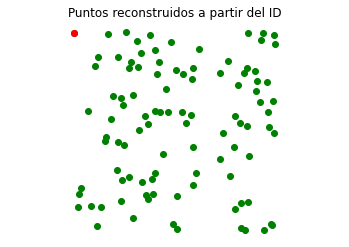

In [44]:
import matplotlib.pyplot as plt

def reconstruir_puntos_por_id(id_concatenado):
    # Eliminar cualquier espacio en blanco y el carácter de coma al final del ID
    id_concatenado = id_concatenado.rstrip(', ')
    
    # Separar las coordenadas usando el separador (;)
    coordenadas = id_concatenado.split(';')
    puntos_reconstruidos = []
    for coord in coordenadas:
        # Separar las coordenadas x e y usando el separador (,)
        x, y = map(int, coord.split(','))
        puntos_reconstruidos.append((x, y))
    return puntos_reconstruidos

# Reutilizamos el ID generado
# id_concatenado = "0000,1000;0787,0196;0626,0932;0229,0041;0024,0641;0709,0483;0736,0871;0777,0415;0670,0246;0111,0999;0845,0135;0289,0456;0094,0379;0084,0254;0722,0982;0112,0362;0968,0313;0797,0926;0831,0359;0659,0488;0475,0747;0717,0113;0178,0068;0369,0000;0743,0358;0811,0948;0558,0017;0838,0836;0829,0600;0712,0698;0267,0507;0148,0404;0177,0105;0893,0999;0255,0579;0675,0903;0818,0873;0598,0862;0583,0389;0896,0058;0440,0819;0471,0703;0567,0304;0724,0269;0037,0420;0086,0926;0272,0243;0107,0702;0190,0577;0123,0506;0963,0904;0844,0628;0956,0208;0796,0306;0727,0718;0461,0801;0199,0602;0696,0342;0904,0969;0342,0777;0935,0303;0186,0076;0919,0110;0689,0164;0664,0256;0616,0390;0390,0689;0308,0798;0710,0041;0579,0143;0065,0175;0962,0445;0221,0150;0850,0144;0092,0143;0044,0897;0447,0475;0612,0779;0800,0853;0734,0131;0091,0178;0786,0186;0873,0090;0605,0586;0953,0882;0119,0946;0305,0163;0556,0306;0814,0407;0479,0828;0552,0651;0424,0266;0845,0184;0736,0586;0462,0465;0687,0932;0897,0157;0717,0826;0349,0077;0536,0410"
                     
# Reconstruir los puntos a partir del ID
puntos_reconstruidos = reconstruir_puntos_por_id(id_concatenado)

# Extraer coordenadas x y y de los puntos reconstruidos
x_reconstruidos = [p[0] for p in puntos_reconstruidos]
y_reconstruidos = [p[1] for p in puntos_reconstruidos]

# Configurar el aspecto del gráfico
plt.axis('equal')
plt.axis('off')  # Ocultar ejes
plt.title('Puntos reconstruidos a partir del ID')

# Graficar los puntos reconstruidos
plt.scatter(x_reconstruidos, y_reconstruidos, label='Puntos reconstruidos', color='green')

# Graficar el punto base en rojo
plt.scatter(P0[0], P0[1], label='Punto base', color='red')

# Mostrar el gráfico
plt.show()


### verfica a partir del  ID

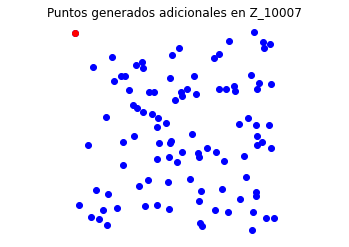

In [37]:
# Generar el ID de los 100 puntos con separador (;) entre las coordenadas
id_concatenado = ";".join([f"{punto[0]:04d},{punto[1]:04d}" for punto in puntos_adicionales])

# Extraer coordenadas x y y de los puntos
x_coords = [p[0] for p in puntos_adicionales]
y_coords = [p[1] for p in puntos_adicionales]

# Configurar el aspecto del gráfico
plt.axis('equal')
plt.axis('off')  # Ocultar ejes
plt.title('Puntos generados adicionales en Z_10007')

# Graficar los puntos adicionales
plt.scatter(x_coords, y_coords, label='Puntos adicionales', color='blue')
# Graficar el punto base en rojo
plt.scatter(P0[0], P0[1], label='Punto base', color='red')

# Mostrar el gráfico
# plt.legend()
plt.show()

### Verificando que queden separados y no solapados
Usando la estrategia de verificar la distancia euclidiana entre el nuevo punto generado y los puntos existentes. Si la distancia es menor que un cierto umbral, puedes generar un nuevo punto hasta que se cumpla la condición de separación mínima.     

ID generado: 0000,1000;0798,0057;0684,0996;0560,0859;0197,0815;0106,0356;0158,0933;0032,0112;0170,0678;0534,0227;0362,0507;0008,0491;0501,0284;0710,0648;0039,0558;0364,0738;0952,0299;0689,0505;0453,0488;0168,0271;0919,0872;0409,0929;0001,0788;0809,0875;0466,0844;0623,0806;0685,0439;0489,0924;0249,0517;0619,0587;0534,0439;0791,0388;0104,0907;0283,0795;0942,0454;0237,0614;0486,0165;0114,0288;0998,0106;0855,0050;0731,0054;0969,0966;0012,0192;0635,0397;0144,0869;0448,0312;0416,0023;0160,0411;0494,0626;0783,0213;0427,0072;0728,0315;0214,0395;0670,0083;0424,0267;0351,0600;0886,0806;0357,0283;0047,0295;0304,0652;0472,0430;0234,0964;0777,0303;0982,0410;0473,0690;0699,0865;0920,0250;0743,0771;0627,0534;0086,0218;0231,0040;0734,0183;0110,0685;0083,0737;0416,0156;0334,0142;0887,0163;0556,0678;0302,0205;0721,0121;0137,0044;0999,0599;0368,0405;0295,0296;0602,0005;0731,0912;0677,0025;0575,0106;0090,0629;0629,0222;0857,0420;0262,0167;0575,0541;0045,0826;0246,0667;0519,0966;0297,0412;0639,0855;0833,01

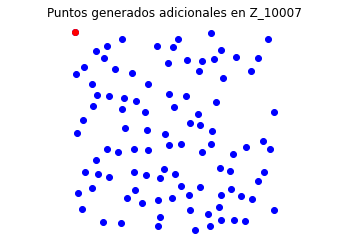

In [70]:
import matplotlib.pyplot as plt
import random
import math
import hashlib

# Definir el campo finito Z_10007
Z_10007 = 10007

# Definir las coordenadas del punto base P0 (en la esquina superior izquierda)
P0 = (0, 1000)

# Definir la función para calcular la distancia euclidiana entre dos puntos
def distancia(p1, p2):
    return math.sqrt((p1[0] - p2[0])**2 + (p1[1] - p2[1])**2)

# Definir el umbral de separación mínima entre puntos
umbral = 50  # Ajusta este valor según tus necesidades

# Generar 99 puntos adicionales en el campo finito Z_10007 alrededor del punto base P0
puntos_adicionales = [P0]
for _ in range(99):
    while True:
        # Generar coordenadas x e y aleatorias alrededor del punto base P0
        x = random.randint(P0[0], P0[0] + 1000)
        y = random.randint(P0[1] - 1000, P0[1])
        
#         # Generar coordenadas x e y aleatorias dentro del campo finito Z_finito
#         # PERO QUEDAN SOLAPADOS
#         x = random.randint(0, Z_finito - 1)
#         y = random.randint(0, Z_finito - 1)
        
        
        
        # Verificar la distancia mínima con los puntos existentes
        distancia_minima = float('inf')
        for punto in puntos_adicionales:
            d = distancia((x, y), punto)
            distancia_minima = min(distancia_minima, d)
        
        # Si la distancia mínima es mayor que el umbral, agregar el nuevo punto y salir del bucle
        if distancia_minima > umbral:
            puntos_adicionales.append((x, y))
            break
    
# Extraer coordenadas x y y de los puntos
x_coords = [p[0] for p in puntos_adicionales]
y_coords = [p[1] for p in puntos_adicionales]

# Configurar el aspecto del gráfico
plt.axis('equal')
plt.axis('off')  # Ocultar ejes
plt.title('Puntos generados adicionales en Z_10007')

# Graficar los puntos adicionales
plt.scatter(x_coords, y_coords, label='Puntos adicionales', color='blue')
# Graficar el punto base
plt.scatter(P0[0], P0[1], label='Punto base', color='red')

# Generar el ID de los 100 puntos con separador (-) entre las coordenadas
id_concatenado = ";".join([f"{punto[0]:04d},{punto[1]:04d}" for punto in puntos_adicionales])

# Calcular el hash SHA-256 del ID concatenado
hash_id = hashlib.sha256(id_concatenado.encode()).hexdigest()

# Mostrar el ID generado y el hash SHA-256
print("ID generado:", id_concatenado)
print ("")
print("Hash SHA-256:", hash_id)

# Mostrar el gráfico
plt.show()


#### Verificando, graficando solamente

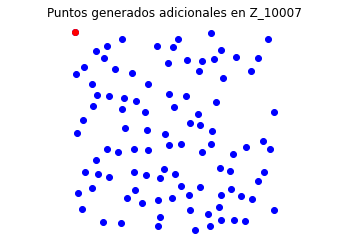

In [71]:
# Generar el ID de los 100 puntos con separador (;) entre las coordenadas
id_concatenado = ";".join([f"{punto[0]:04d},{punto[1]:04d}" for punto in puntos_adicionales])

# Extraer coordenadas x y y de los puntos
x_coords = [p[0] for p in puntos_adicionales]
y_coords = [p[1] for p in puntos_adicionales]

# Configurar el aspecto del gráfico
plt.axis('equal')
plt.axis('off')  # Ocultar ejes
plt.title('Puntos generados adicionales en Z_10007')

# Graficar los puntos adicionales
plt.scatter(x_coords, y_coords, label='Puntos adicionales', color='blue')
# Graficar el punto base en rojo
plt.scatter(P0[0], P0[1], label='Punto base', color='red')

# Mostrar el gráfico
# plt.legend()
plt.show()

### Generando el hash a partir del gráfico

Reconstruir los puntos a partir del id_concatenado.
Calcular el hash SHA-256 del id_concatenado reconstruido.
Graficar los puntos reconstruidos.
Mostrar el hash SHA-256 calculado.
Aquí tienes el código completo:

673b3f909c13258c7ab7a6eb4f12667bfc1864cc461c3a9e706aa097a08d9d1d


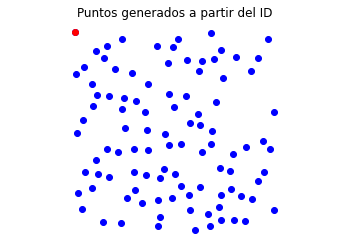

In [72]:
import matplotlib.pyplot as plt
import hashlib

# Función para reconstruir los puntos a partir del id_concatenado
def reconstruir_puntos(id_concatenado):
    puntos = []
    coordenadas = id_concatenado.split(';')
    for coord in coordenadas:
        if coord:  # Ignorar cadenas vacías (por el último ';' en el id_concatenado)
            # Separar las coordenadas x e y usando el separador (,)
            x, y = map(int, coord.split(','))
            puntos.append((x, y))
    return puntos

# Generar el ID de los 100 puntos con separador (;) entre las coordenadas
#id_concatenado = "0000,1000;0641,0312;0067,0676;0647,0390;0881,0934;0367,0615;0363,0679;0666,0867;0243,0887;0502,0618;0843,0196;0566,0059;0357,0615;0939,0909;0892,0096;0255,0240;0497,0213;0789,0942;0697,0007;0334,0198;0183,0336;0529,0659;0645,0244;0740,0939;0023,0861;0023,0870;0470,0811;0376,0101;0362,0160;0330,0850;0097,0618;0375,0416;0573,0760;0917,0574;0112,0377;0799,0779;0464,0299;0878,0580;0784,0675;0783,0024;0018,0848;0881,0806;0898,0582;0330,0925;0069,0908;0675,0943;0658,0677;0066,0056;0317,0037;0936,0376;0324,0734;0091,0400;0083,0545;0658,0108;0670,0345;0748,0190;0184,0809;0158,0996;0777,0500;0183,0874;0820,0368;0921,0313;0790,0295;0994,0998;0819,0915;0066,0108;0974,0390;0554,0000;0908,0067;0810,0229;0711,0943;0383,0654;0401,0232;0580,0584;0016,0347;0260,0029;0261,0750;0352,0438;0336,0198;0634,0916;0112,0097;0162,0212;0771,0510;0745,0702;0019,0105;0437,0587;0022,0198;0513,0297;0707,0215;0103,0552;0051,0264;0056,0347;0881,0873;0449,0739;0603,0786;0188,0739;0194,0493;0871,0811;0566,0287;0364,0896"

# Reconstruir los puntos a partir del ID
puntos_reconstruidos = reconstruir_puntos(id_concatenado)

# Calcular el hash SHA-256 del ID concatenado
hash_id = hashlib.sha256(id_concatenado.encode()).hexdigest()

# Extraer coordenadas x y y de los puntos reconstruidos
x_coords = [p[0] for p in puntos_reconstruidos]
y_coords = [p[1] for p in puntos_reconstruidos]

# Configurar el aspecto del gráfico
plt.axis('equal')
plt.axis('off')  # Ocultar ejes
plt.title('Puntos generados a partir del ID')

# Graficar los puntos reconstruidos
plt.scatter(x_coords, y_coords, label='Puntos reconstruidos', color='blue')

# Graficar el punto base en rojo
plt.scatter(P0[0], P0[1], label='Punto base', color='red')

# Mostrar el hash SHA-256 del ID generado
print (hash_id)

# Mostrar el gráfico
plt.show()
